# Save and access model data

In [18]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [19]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [20]:
# 1ère entrée (variables 0 à 4 du dataset)
X_train_wide = X_train[:,:5].copy()
X_train_deep = X_train[:,2:].copy()
X_test_wide = X_test[:,:5].copy()
X_test_deep = X_test[:,2:].copy()

print(X_train_wide.shape)
print(X_train_deep.shape)

(16512, 5)
(16512, 6)


In [21]:
layer_norm12 = keras.layers.Normalization()
layer_norm22 = keras.layers.Normalization()
layer_hidden12 = keras.layers.Dense(30,activation="relu")
layer_hidden22 = keras.layers.Dense(30,activation="relu")
layer_concat12 = keras.layers.Concatenate()
layer_output12 = keras.layers.Dense(1)
input_wide = keras.layers.Input(shape=X_train_wide.shape[1:],name = "input_wide")
input_deep = keras.layers.Input(shape=X_train_deep.shape[1:],name = "input_deep")


In [22]:
norm12 = layer_norm12(input_wide)
norm22 = layer_norm22(input_deep)
hidden12 = layer_hidden12(norm22)
hidden22 = layer_hidden22(hidden12)
concat12 = layer_concat12([norm12,hidden22])
output12 = layer_output12(concat12)


In [23]:
model2 = keras.Model(inputs=[input_wide,input_deep],outputs=[output12])
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model2.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
layer_norm12.adapt(X_train_wide)
layer_norm22.adapt(X_train_deep)

In [24]:
history2 = model2.fit({"input_wide":X_train_wide,"input_deep":X_train_deep},y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 2s 2ms/step - loss: 1.2820 - root_mean_squared_error: 1.1323 - val_loss: 0.5885 - val_root_mean_squared_error: 0.7671
Epoch 2/30
413/413 [==============================] - 1s 2ms/step - loss: 0.5039 - root_mean_squared_error: 0.7099 - val_loss: 0.4680 - val_root_mean_squared_error: 0.6841
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.4288 - root_mean_squared_error: 0.6548 - val_loss: 0.4379 - val_root_mean_squared_error: 0.6618
Epoch 4/30
413/413 [==============================] - 1s 3ms/step - loss: 0.4060 - root_mean_squared_error: 0.6371 - val_loss: 0.4270 - val_root_mean_squared_error: 0.6534
Epoch 5/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3925 - root_mean_squared_error: 0.6265 - val_loss: 0.4231 - val_root_mean_squared_error: 0.6504
Epoch 6/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3840 - root_mean_squared_error: 0.6197 - val_loss: 0.4072 - val_

129/129 [==============================] - 0s 1ms/step


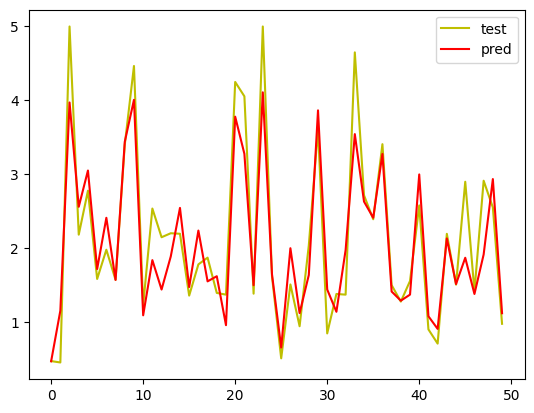

129/129 [==============================] - 0s 1ms/step - loss: 0.3365 - root_mean_squared_error: 0.5800
[0.3364501893520355, 0.5800432562828064]


In [25]:
y_pred2 = model2.predict((X_test_wide,X_test_deep))
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred2[:50], c="r", label = "pred")
plt.legend()
plt.show()
evaluation_before_saving = model2.evaluate((X_test_wide,X_test_deep),y_test)
print(evaluation_before_saving)

In [26]:
model2.save("my_keras_model")


INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


129/129 [==============================] - 0s 2ms/step


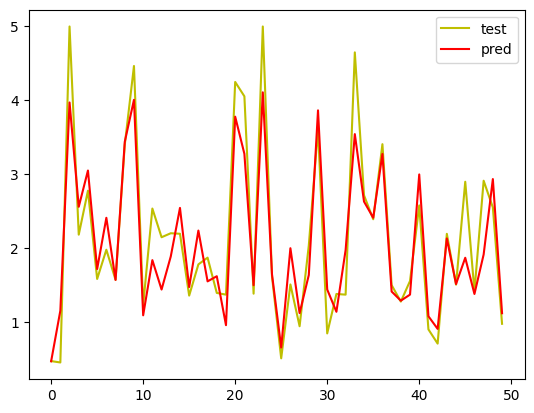

129/129 [==============================] - 0s 1ms/step - loss: 0.3365 - root_mean_squared_error: 0.5800
[0.3364501893520355, 0.5800432562828064]


In [28]:
model2_loaded = keras.models.load_model("my_keras_model")
y_pred2_loaded = model2_loaded.predict((X_test_wide,X_test_deep))
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred2_loaded[:50], c="r", label = "pred")
plt.legend()
plt.show()
print(model2.evaluate((X_test_wide,X_test_deep),y_test))

## Enregistrer uniquement les poids
Ne pas oublier de mettre l'extention .weights.h5 : "my_weights.weights.h5"

In [29]:
model2.save_weights("my_weights.weights.h5")
history2 = model2.fit({"input_wide":X_train_wide,"input_deep":X_train_deep},y_train,epochs=30,validation_split=0.2)


Epoch 1/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3087 - root_mean_squared_error: 0.5556 - val_loss: 0.3375 - val_root_mean_squared_error: 0.5810
Epoch 2/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3070 - root_mean_squared_error: 0.5541 - val_loss: 0.3332 - val_root_mean_squared_error: 0.5773
Epoch 3/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3053 - root_mean_squared_error: 0.5525 - val_loss: 0.3338 - val_root_mean_squared_error: 0.5777
Epoch 4/30
413/413 [==============================] - 1s 2ms/step - loss: 0.3075 - root_mean_squared_error: 0.5545 - val_loss: 0.3324 - val_root_mean_squared_error: 0.5765
Epoch 5/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3035 - root_mean_squared_error: 0.5509 - val_loss: 0.3309 - val_root_mean_squared_error: 0.5752
Epoch 6/30
413/413 [==============================] - 1s 3ms/step - loss: 0.3077 - root_mean_squared_error: 0.5547 - val_loss: 0.3318 - val_

<p>Les poids du modèle avant le second entraînement ont bien été enregistrés:</p>
<p>Ils donnent une prédiction moins bonne que celuis entraîné une deuxième fois</p>

In [30]:
evaluation_before_importing_past_weights = model2.evaluate((X_test_wide,X_test_deep),y_test)
model2.load_weights("my_weights.weights.h5")
evaluation_after_importing_past_weights = model2.evaluate((X_test_wide,X_test_deep),y_test)


129/129 [==============================] - 0s 1ms/step - loss: 0.3365 - root_mean_squared_error: 0.5800


# Utilisation des callbacks (rappels)

Faire des checkpoints pour enregistrer des infos du modèle à intervalles réguliers lors de l'entraînement.

In [31]:
# Enregistrer uniquements les poids à la fin de chaque époque (par défaut) et seulement si ils donnent un résultat meilleur sur la validation:
checkpoint = keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                             save_best_only=True,
                                             save_weights_only=True)
history2 = model2.fit({"input_wide":X_train_wide,"input_deep":X_train_deep},
                      y_train,epochs=20,
                      validation_split=0.2,
                      callbacks=[checkpoint])



Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3084 - root_mean_squared_error: 0.5554 - val_loss: 0.3358 - val_root_mean_squared_error: 0.5795
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3082 - root_mean_squared_error: 0.5552 - val_loss: 0.3322 - val_root_mean_squared_error: 0.5764
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3045 - root_mean_squared_error: 0.5518 - val_loss: 0.3291 - val_root_mean_squared_error: 0.5737
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3047 - root_mean_squared_error: 0.5520 - val_loss: 0.3357 - val_root_mean_squared_error: 0.5794
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3071 - root_mean_squared_error: 0.5542 - val_loss: 0.3331 - val_root_mean_squared_error: 0.5772
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3076 - root_mean_squared_error: 0.5546 - val_loss: 0.3404 - val_

In [34]:
model2_loaded.load_weights("my_weights.weights.h5")
evaluation_before_importing=model2_loaded.evaluate((X_test_wide,X_test_deep),y_test)
model2_loaded.load_weights("my_checkpoints.weights.h5")
evaluation_after_importing=model2_loaded.evaluate((X_test_wide,X_test_deep),y_test)
print(evaluation_before_importing)
print(evaluation_after_importing)



129/129 [==============================] - 0s 1ms/step - loss: 0.3365 - root_mean_squared_error: 0.5800


129/129 [==============================] - 0s 2ms/step - loss: 0.3153 - root_mean_squared_error: 0.5615
[0.3364501893520355, 0.5800432562828064]
[0.31526798009872437, 0.5614873170852661]


Arrêtre l'entraînement du modèle lorsqu'il ne d'améliore plus sur le validation_test et réstore les meilleurs params à la fin de l'entraînement.

In [36]:
# restore_best_weights => revenir aux meilleurs params à la fin de l'entraînement
# si le modèle ne n'améliore plus entre N=patience époques, keras arrête d'entraîner le modèle

early_stop = keras.callbacks.EarlyStopping(restore_best_weights=True,patience = 10)

In [39]:
model2.load_weights("my_weights.weights.h5")
history2 = model2.fit({"input_wide":X_train_wide,"input_deep":X_train_deep},
                      y_train,epochs=100,
                      validation_split=0.2,
                      callbacks=[checkpoint,early_stop])

Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3099 - root_mean_squared_error: 0.5567 - val_loss: 0.3353 - val_root_mean_squared_error: 0.5790
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3050 - root_mean_squared_error: 0.5523 - val_loss: 0.3451 - val_root_mean_squared_error: 0.5875
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3072 - root_mean_squared_error: 0.5543 - val_loss: 0.3388 - val_root_mean_squared_error: 0.5821
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3058 - root_mean_squared_error: 0.5530 - val_loss: 0.3295 - val_root_mean_squared_error: 0.5741
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3059 - root_mean_squared_error: 0.5531 - val_loss: 0.3395 - val_root_mean_squared_error: 0.5826
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3032 - root_mean_squared_error: 0.5506 - val_loss: 0.3306 

In [40]:
# Les meilleurs paramètres sont bien ceux gardés à la fin pour le modèle.
# L'entraînement s'est bien arrêté avant la fin
evaluation_before_loading_best_params = model2.evaluate((X_test_wide,X_test_deep),y_test)
model2.load_weights("my_checkpoints.weights.h5")
evaluation_after_loading_best_params = model2.evaluate((X_test_wide,X_test_deep),y_test)
print(evaluation_after_loading_best_params)
print(evaluation_before_loading_best_params)

129/129 [==============================] - 0s 2ms/step - loss: 0.3123 - root_mean_squared_error: 0.5588
[0.3122885525226593, 0.558827817440033]
[0.3122885525226593, 0.558827817440033]
